In [3]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [6]:
file_path = 'RockData.csv'  
df = pd.read_csv(file_path)

In [7]:
X = df[['popularity', 'danceability']]

In [18]:
kmeans = KMeans(n_clusters=4, n_init='auto', random_state=None, algorithm='lloyd')  
kmeans.fit(X)

KMeans(n_clusters=4)

In [19]:
# clustered_songs = df[['name', 'artist', 'popularity', 'danceability', 'cluster']]
# print(clustered_songs)
# here I print which song in which cluster is

In [20]:
df['distance_from_origin'] = np.sqrt(df['popularity']**2 + df['danceability']**2)

farthest_song = df.loc[df['distance_from_origin'].idxmax()]
nearest_song = df.loc[df['distance_from_origin'].idxmin()]

# finding two most different songs

print("Farthest Song:")
print(f"Name: {farthest_song['name']}, Artist: {farthest_song['artist']}, Distance: {farthest_song['distance_from_origin']}\n")

print("Nearest Song:")
print(f"Name: {nearest_song['name']}, Artist: {nearest_song['artist']}, Distance: {nearest_song['distance_from_origin']}\n")


Farthest Song:
Name: Jingle Bell Rock, Artist: Bobby Helms, Distance: 84.00338395564788

Nearest Song:
Name: You Wreck Me - Commentary, Artist: Various Artists, Distance: 0.0



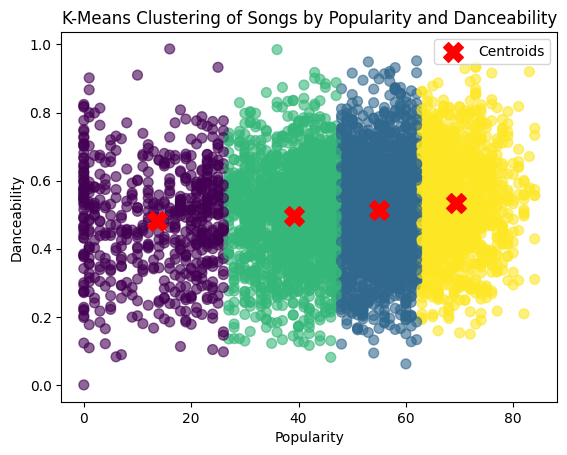

In [24]:
plt.scatter(X['popularity'], X['danceability'], c=df['cluster'], cmap='viridis', s=50, alpha=0.6)

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')


plt.xlabel('Popularity')
plt.ylabel('Danceability')
plt.title('K-Means Clustering of Songs by Popularity and Danceability')
plt.legend()  

plt.show()
